#Syria Tel Customer Churn

## Table of contents
* [Introduction](https://colab.research.google.com/drive/1u8Mavar1GonwrCCGN9TFOnKf6mrUoOPc#scrollTo=bBPud1rF0815&line=1&uniqifier=1)
* [Problem statement](https://colab.research.google.com/drive/1u8Mavar1GonwrCCGN9TFOnKf6mrUoOPc#scrollTo=QchcXofJJ44y&line=2&uniqifier=1)
* [Objectives](https://colab.research.google.com/drive/1u8Mavar1GonwrCCGN9TFOnKf6mrUoOPc#scrollTo=m2Hm9UuoIwgj&line=1&uniqifier=1)
* [Data Loading and Basic EDA](https://colab.research.google.com/drive/1u8Mavar1GonwrCCGN9TFOnKf6mrUoOPc#scrollTo=v33EJB6ku3tJ&line=1&uniqifier=1)
* [Exploratory Data Analysis (EDA)](https://colab.research.google.com/drive/1u8Mavar1GonwrCCGN9TFOnKf6mrUoOPc#scrollTo=hoNsmKluyqur&line=1&uniqifier=1)
* [Data Preprocessing](https://colab.research.google.com/drive/1u8Mavar1GonwrCCGN9TFOnKf6mrUoOPc#scrollTo=Ty7JJBft814g&line=1&uniqifier=1)
* [Classification](https://colab.research.google.com/drive/1u8Mavar1GonwrCCGN9TFOnKf6mrUoOPc#scrollTo=U2FGZsDM9bD2&line=2&uniqifier=1)
* [Model Evaluation](https://colab.research.google.com/drive/1u8Mavar1GonwrCCGN9TFOnKf6mrUoOPc#scrollTo=OZTtZT6C-WZ5&line=1&uniqifier=1)
* [Additional Metrics and Model Optimization](https://colab.research.google.com/drive/1u8Mavar1GonwrCCGN9TFOnKf6mrUoOPc#scrollTo=YrJzQ3PX_w_K&line=3&uniqifier=1)

## Introduction

The SyriaTel Customer Churn project aims to leverage machine learning techniques for analyzing telecommunications data and customer behavior patterns. Let’s delve into the details:

Project Overview:
The project focuses on accurately identifying potential churners among SyriaTel’s customer base.
By employing machine learning techniques, the goal is to predict customers who are at risk of churning.
This enables SyriaTel to implement targeted strategies and interventions to retain those customers, mitigate revenue loss, and enhance overall business performance and profitability.

## Problem Statement:
SyriaTel, a telecommunications company, aims to mitigate revenue loss and enhance business performance by identifying customers at risk of churning. Leveraging machine learning techniques, the project focuses on predicting customer churn based on telecommunications data and behavior patterns.

## Objectives

1. **Customer Churn Prediction**: Predicting whether a customer will churn or not based on their telecommunications data and behavior patterns.

2. **Model Evaluation and Selection**: Evaluating and selecting the best-performing machine learning model for churn prediction.

3. **Model Interpretation**: Understanding how the selected model makes predictions and which features are most important in predicting churn.

4. **Model Fine-Tuning**: Optimizing the selected model's hyperparameters to improve its performance.

## Data Loading and Basic Data Analysis (Exploratory Data Analysis - EDA)
* Import necessary libraries.
* Load the dataset from a CSV file.
* Display data size, column names, summary statistics, and the first two rows of the dataset.
* Determined the dataset size (number of rows and columns).
* Listed column names and data types.
* Displayed the first two rows for a quick data preview.
* Generated summary statistics (mean, standard deviation, quartiles) for numerical columns.

In [194]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tabulate import tabulate
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

In [ ]:
# Load the dataset
churn = pd.read_csv('bigml_59c28831336c6604c800002a.csv', sep=',')
churn

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
# Display data size
print("Data Size:", churn.shape)

Data Size: (3333, 21)


In [ ]:
# Get column information
column_info = churn.info()

# Print column information
print(column_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
# Display summary statistics
print("\nSummary Statistics:")
print(churn.describe())


Summary Statistics:
       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.06

In [ ]:
# Display the first two rows of the dataset
print("\nFirst Two Rows of the Dataset:")
print(churn.head(2))


First Two Rows of the Dataset:
  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3                2.7   
1     

## EDA
**Objective**: The objective of the Exploratory Data Analysis (EDA) is to understand the structure, distribution, and key characteristics of the churn dataset to inform subsequent data preprocessing and modeling steps.

Summary:

1. Data Overview:

  * Counted missing values in each column.

2. Distribution Analysis:

  * Created histograms for numerical features to visualize their distributions.
  * Used boxplots to identify outliers.
  
3. Correlation and Relationships:

  * Constructed a correlation heatmap to identify relationships between numerical features.
  * Generated pairplots to explore potential feature interactions.

4. Categorical Data Analysis:

  * Provided value counts for categorical columns to understand category distributions.
  * Plotted a count plot for the target variable (Churn) to see churn rates.


In [ ]:
# Checking for missing values
missing_values = churn.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [ ]:
# Value counts for categorical columns
for column in churn.select_dtypes(include=['object']).columns:
    print(f"\nValue Counts for {column}:\n", churn[column].value_counts())


Value Counts for state:
 state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

Value Counts for phone number:
 phone number
382-4657    1
348-7071    1
389-6082    1
415-3689    1
379-2503    1
           ..
352-1127    1
368-1288    1
403-5279    1
397-9333    1
400-4344    1
Name: count, Length: 3333, dtype: int64

Value Counts for international plan:
 international plan
no     3010
yes     323
Name: count, dtype: int64

Value Counts for voice mail plan:
 voice mail plan
no     2411
yes     922
Name: co

### Visualizations

In [ ]:
# Create a new data frame for our visualization analysis
# Select only the numeric features and the target variable 'churn'
numeric_features = churn.select_dtypes(include=['float64', 'int64']).columns
churn_numeric = churn[numeric_features]

# Ensure the target column 'churn' is included
churn_numeric['churn'] = churn['churn']

# Display the dataframe
print(churn_numeric.head())


   account length  area code  number vmail messages  total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   

   total day calls  total day charge  total eve minutes  total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   total eve charge  total night minutes  total night calls  \
0             16.78                

<ipython-input-83-0203b134ee18>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_numeric['churn'] = churn['churn']


In [ ]:
# List of 5 relevant numerical columns for visualizations
relevant_numerical_columns = [
    'total day minutes',
    'total day calls',
    'total eve minutes',
    'total eve calls',
    'customer service calls'
]

In [ ]:
#Assign our churn_numeric as our data frame
df = churn_numeric

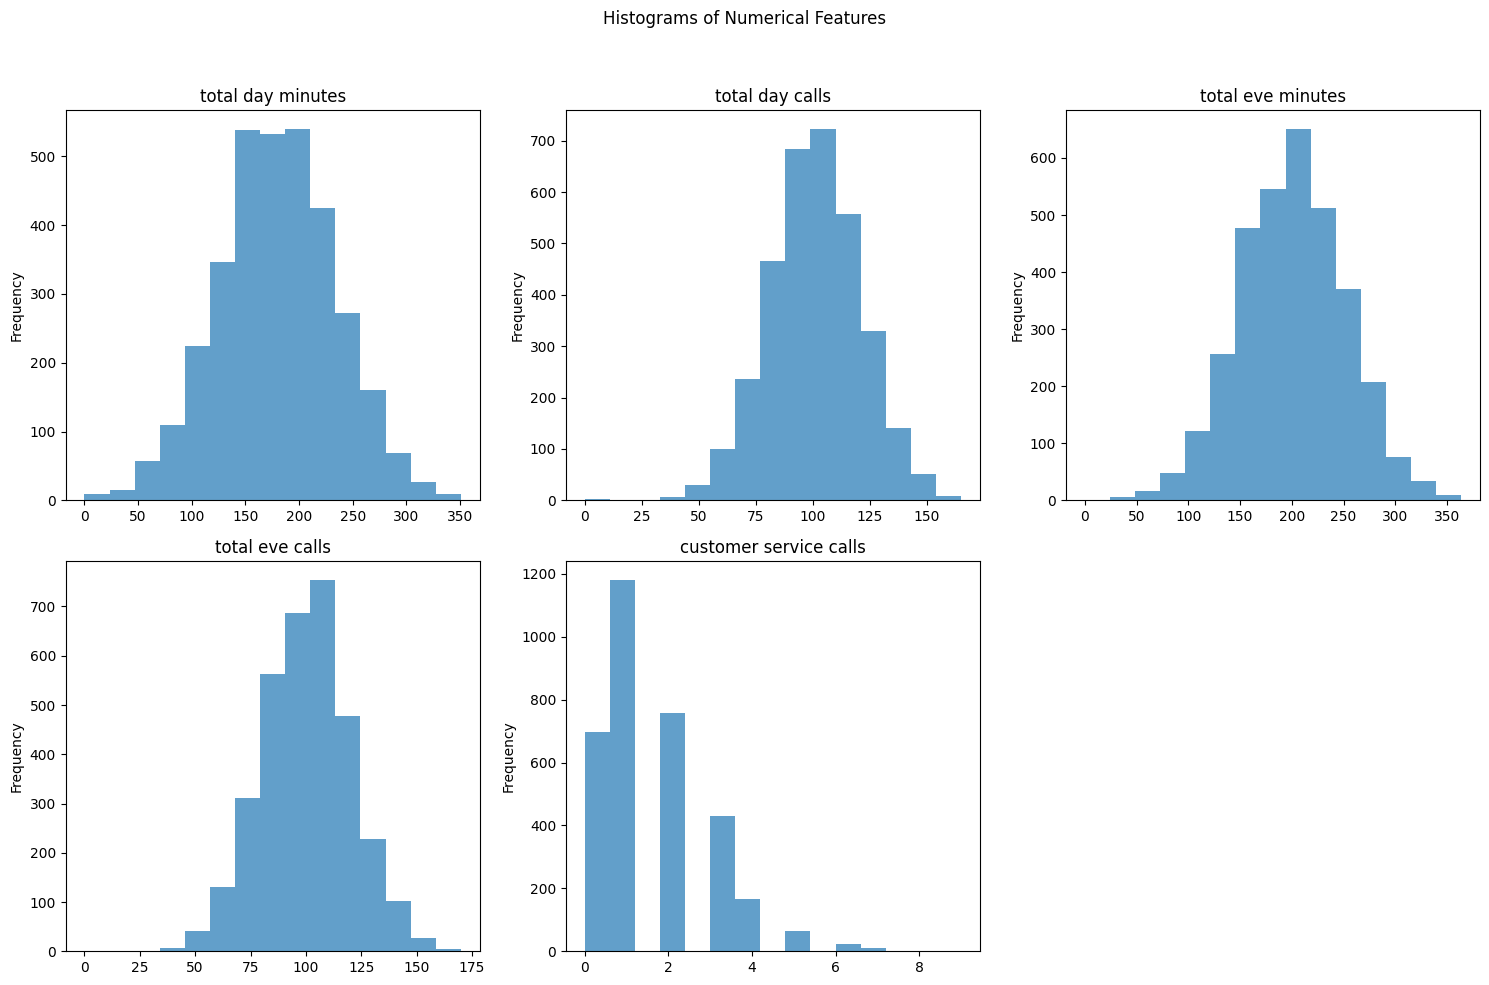

In [ ]:
# Creating the histogram plot
fig, axes = plt.subplots(nrows=int(len(relevant_numerical_columns) / 3) + 1, ncols=3, figsize=(15, 10))

for ax, column in zip(axes.flatten(), relevant_numerical_columns):
    df[column].plot.hist(bins=15, ax=ax, alpha=0.7)
    ax.set_title(column)

# Remove empty subplots if any
for i in range(len(relevant_numerical_columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the suptitle
plt.show()


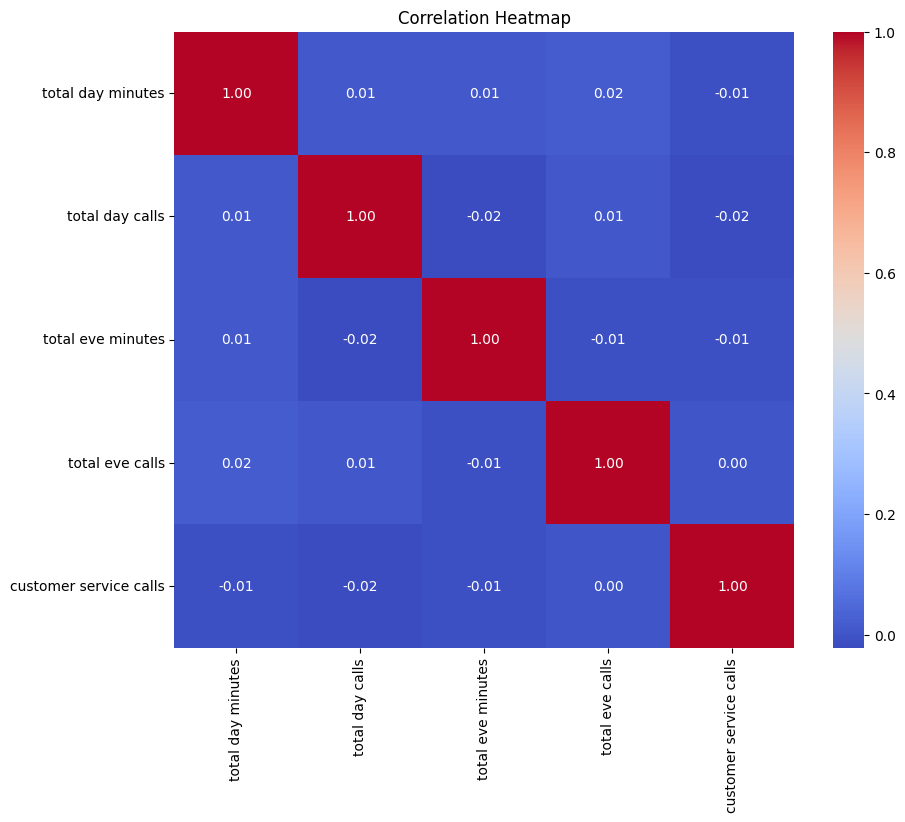

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[relevant_numerical_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Calculate the correlation matrix
corr_matrix = churn_numeric.corr()

# Extract correlations with the target variable 'churn'
target_corr = corr_matrix['churn'].drop('churn')  # Drop the target variable itself

# Sort the correlations in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Display the correlations
print("Correlation between numeric features and target variable 'churn':\n")
print(target_corr_sorted)


Correlation between numeric features and target variable 'churn':

customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64


Observations:
`customer service` calls and `total day minutes/charge` show the highest positive correlation with `churn`.
`number vmail messages` has a negative correlation with `churn`, suggesting that customers with more voicemail messages are less likely to churn.

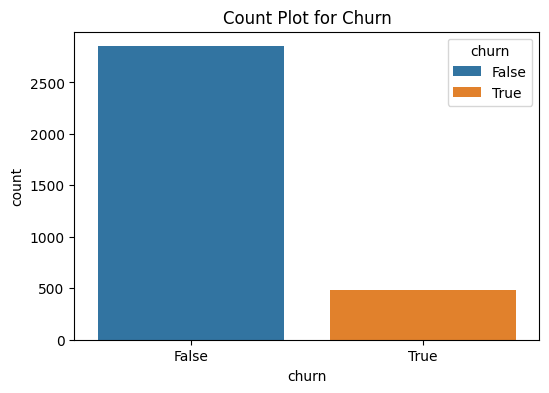

In [ ]:
# Count plot for target variable with 'true' and 'false' as different colors
target_column = 'churn'  # Correct target variable name
plt.figure(figsize=(6, 4))
sns.countplot(x=target_column, hue=target_column, data=churn_numeric, palette=['#1f77b4', '#ff7f0e'])
plt.title('Count Plot for ' + target_column.capitalize())
plt.show()

In [ ]:
# Count plot for target variable with 'true' and 'false' as different colors
target_column = 'churn'  # Correct target variable name

# Calculate value counts of the target variable
target_value_counts = churn_numeric[target_column].value_counts()

# Create a DataFrame to display the counts in a tabulated format
target_counts_df = pd.DataFrame(target_value_counts)
target_counts_df.columns = ['Count']

# Rename the index to match the target variable values
target_counts_df.index.name = target_column

# Display the tabulated version
print(target_counts_df)

       Count
churn       
False   2850
True     483


Observations:
Majority of the customers (2850) have not churned, while 483 customers have churned.

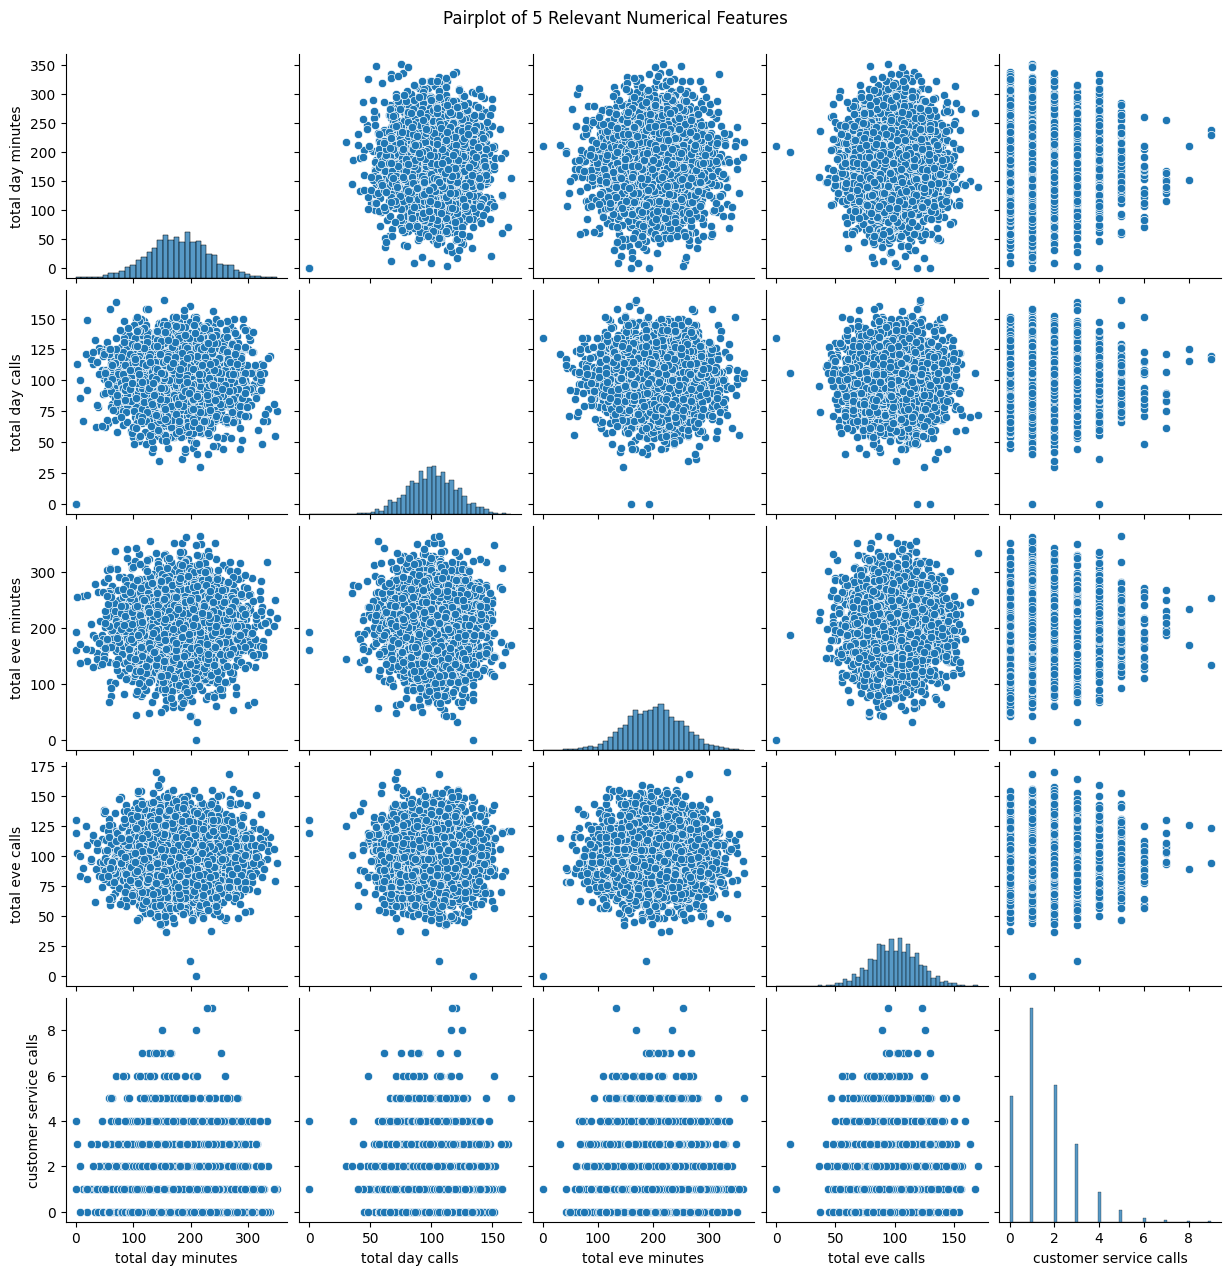

In [ ]:
# Pairplot for the 5 relevant numerical features
sns.pairplot(churn_numeric[relevant_numerical_columns])
plt.suptitle('Pairplot of 5 Relevant Numerical Features', y=1.02)
plt.show()

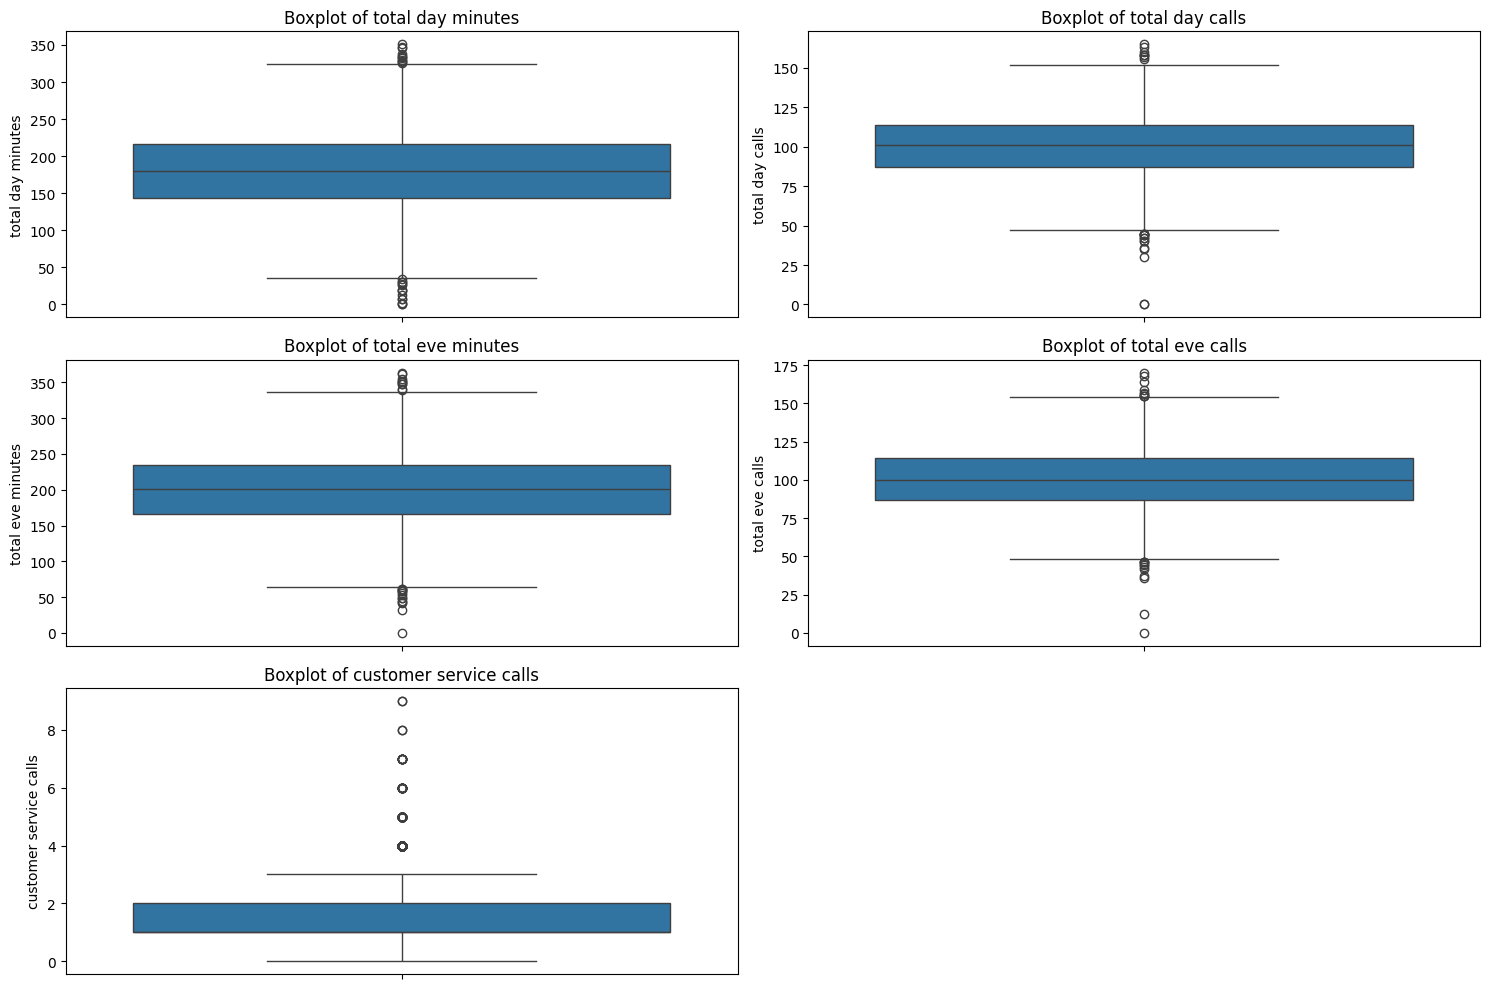

In [ ]:
# Boxplots for relevant numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(relevant_numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=churn_numeric, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
# Summary of categorical features
categorical_features = churn.select_dtypes(include=['object']).nunique()
print("\nSummary of Categorical Features:\n", categorical_features)


Summary of Categorical Features:
 state                   51
phone number          3333
international plan       2
voice mail plan          2
dtype: int64


## Data Preprocessing (Data Cleaning)
Actions:
* Identify the target variable (churn).
* Drop unnecessary columns (phone number and churn).
* Convert “yes” and “no” values in specific columns to boolean.
* Label encode the “area code” column.
* Perform one-hot encoding on the “state” column.
* Handle missing values using mean imputation.

In [ ]:
# Identify the target variable
churn_target = churn['churn']

In [ ]:
# Drop unnecessary columns
cols_to_drop = ['phone number', 'churn']
churn_feature = churn.drop(cols_to_drop, axis=1)

In [ ]:
# Convert 'yes' and 'no' values to boolean
yes_no_cols = ["international plan", "voice mail plan"]
churn_feature[yes_no_cols] = churn_feature[yes_no_cols] == 'yes'

In [ ]:
# Label encode the 'area code' column
label_encoder = preprocessing.LabelEncoder()
churn_feature['area code'] = label_encoder.fit_transform(churn_feature['area code'])

In [ ]:
# One-hot encode categorical variables
X = pd.get_dummies(churn_feature)

# One-hot encode the 'state' column
print("Churn data size before one-hot encoding:", churn_feature.shape)
print("Number of unique states:", len(churn_feature['state'].unique()))
churn_dumm = pd.get_dummies(churn_feature, columns=["state"], prefix=["state"])
print("Churn data size after one-hot encoding:", churn_dumm.shape)
churn_dumm

Churn data size before one-hot encoding: (3333, 19)
Number of unique states: 51
Churn data size after one-hot encoding: (3333, 69)


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,1,False,True,25,265.1,110,45.07,197.4,99,...,False,False,False,False,False,False,False,False,False,False
1,107,1,False,True,26,161.6,123,27.47,195.5,103,...,False,False,False,False,False,False,False,False,False,False
2,137,1,False,False,0,243.4,114,41.38,121.2,110,...,False,False,False,False,False,False,False,False,False,False
3,84,0,True,False,0,299.4,71,50.90,61.9,88,...,False,False,False,False,False,False,False,False,False,False
4,75,1,True,False,0,166.7,113,28.34,148.3,122,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,False,True,36,156.2,77,26.55,215.5,126,...,False,False,False,False,False,False,False,False,False,False
3329,68,1,False,False,0,231.1,57,39.29,153.4,55,...,False,False,False,False,False,False,False,False,True,False
3330,28,2,False,False,0,180.8,109,30.74,288.8,58,...,False,False,False,False,False,False,False,False,False,False
3331,184,2,True,False,0,213.8,105,36.35,159.6,84,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Handle missing values
imp = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None, verbose=0, copy=True)
churn_matrix = imp.fit_transform(churn_dumm.values.astype(np.float64))

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


## Classification
Steps:
* Train a Decision Tree Classifier.
* Train a Naive Bayes Classifier.
* Train a Random Forest Classifier.

In [ ]:
# Standardize the data by removing the mean and scaling to unit variance
scaler = StandardScaler()
churn_matrix_scaled = scaler.fit_transform(churn_matrix)

In [ ]:
# Define the seed variable
seed = 42

# Split the data into 80% train, 10% validation, and 10% test
X_train, X_temp, y_train, y_temp = train_test_split(churn_matrix_scaled, churn_target, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

This code splits the data into 80% training, 10% validation, and 10% testing sets. It also standardizes the data and ensures reproducibility by fixing the random seed.

In [ ]:
# Function to train and evaluate a classifier
def train_and_evaluate_classifier(classifier, train_data, train_label, test_data, test_label, target_names):
    classifier.fit(train_data, train_label)
    predicted_target = classifier.predict(test_data)
    score = classifier.score(test_data, test_label)
    print(f'{classifier.__class__.__name__}: {score}')
    print('Accuracy Score:', accuracy_score(test_label, predicted_target))
    print('Confusion Matrix:\n', confusion_matrix(test_label, predicted_target))
    print(classification_report(test_label, predicted_target, target_names=target_names))

# Main function
def main():
    # Initialize classifiers
    classifiers = [
        RandomForestClassifier(random_state=seed),
        DecisionTreeClassifier(random_state=seed),
        GaussianNB(),
        SVC(probability=True, random_state=seed)
    ]

    # Train and evaluate each classifier
    for classifier in classifiers:
        print("\n===============================")
        print(f"Evaluating {classifier.__class__.__name__}")
        train_and_evaluate_classifier(classifier, train_data, train_label, test_data, test_label, target_names)

if __name__ == "__main__":
    main()



Evaluating RandomForestClassifier
RandomForestClassifier: 0.9461077844311377
Accuracy Score: 0.9461077844311377
Confusion Matrix:
 [[279   1]
 [ 17  37]]
              precision    recall  f1-score   support

      False.       0.94      1.00      0.97       280
       True.       0.97      0.69      0.80        54

    accuracy                           0.95       334
   macro avg       0.96      0.84      0.89       334
weighted avg       0.95      0.95      0.94       334


Evaluating DecisionTreeClassifier
DecisionTreeClassifier: 0.9101796407185628
Accuracy Score: 0.9101796407185628
Confusion Matrix:
 [[261  19]
 [ 11  43]]
              precision    recall  f1-score   support

      False.       0.96      0.93      0.95       280
       True.       0.69      0.80      0.74        54

    accuracy                           0.91       334
   macro avg       0.83      0.86      0.84       334
weighted avg       0.92      0.91      0.91       334


Evaluating GaussianNB
GaussianNB: 0

## Model Evaluation
Actions:
* Evaluate the Decision Tree Classifier using accuracy, confusion matrix, and classification report.
* Evaluate the Naive Bayes Classifier.
* Evaluate the Random Forest Classifier.
* Calculate cross-validation scores for the Decision Tree Classifier.
* Compute feature importances for the Decision Tree Classifier.

In [ ]:
# Define rf_classifier and sv_classifier (if necessary)
rf_classifier = RandomForestClassifier(random_state=seed)
sv_classifier = SVC(kernel="linear", C=0.025,random_state=seed)
dt_classifier = DecisionTreeClassifier(random_state=seed)
nb_classifier = GaussianNB()


# List of classifiers with their respective names
classifiers = [
    (dt_classifier, 'Decision Tree'),
    (rf_classifier, 'Random Forest'),
    (nb_classifier, 'Naive Bayes'),
    (sv_classifier, 'Support Vector')
]

# Initialize variables to track the best classifier and its mean CV score
best_classifier = None
best_mean_cv_score = float('-inf')

# Evaluate each classifier using cross-validation
for classifier, name in classifiers:
    cv_scores = cross_val_score(classifier, train_data, train_label, cv=5)
    mean_cv_score = np.mean(cv_scores)

    print(f"\nClassifier: {name}")
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Score:", mean_cv_score)

    # Update the best classifier if the current one has a higher mean CV score
    if mean_cv_score > best_mean_cv_score:
        best_classifier = classifier
        best_mean_cv_score = mean_cv_score

# Select the best classifier based on mean CV score
print(f"\nBest Classifier: {best_classifier.__class__.__name__} with Mean CV Score: {best_mean_cv_score}")


Classifier: Decision Tree
Cross-Validation Scores: [0.93       0.915      0.92333333 0.92666667 0.93155259]
Mean CV Score: 0.9253105175292153

Classifier: Random Forest
Cross-Validation Scores: [0.93666667 0.93833333 0.935      0.93333333 0.94490818]
Mean CV Score: 0.9376483027267668

Classifier: Naive Bayes
Cross-Validation Scores: [0.565      0.63833333 0.54333333 0.53166667 0.62103506]
Mean CV Score: 0.5798736783528102

Classifier: Support Vector
Cross-Validation Scores: [0.85666667 0.85666667 0.85666667 0.85666667 0.85809683]
Mean CV Score: 0.8569526989426823

Best Classifier: RandomForestClassifier with Mean CV Score: 0.9376483027267668


## Model Optimization (Additional Metrics)
Actions:
* Calculate the ROC-AUC score for the chosen model, in this case Random Forest.
* Use other metrics such as feature importance and confusion matrix to test our model.
* Fine-tune our model and test it's predictive capabilities in checking which customers are likely to churn.

ROC-AUC Score for Random Forest: 0.93


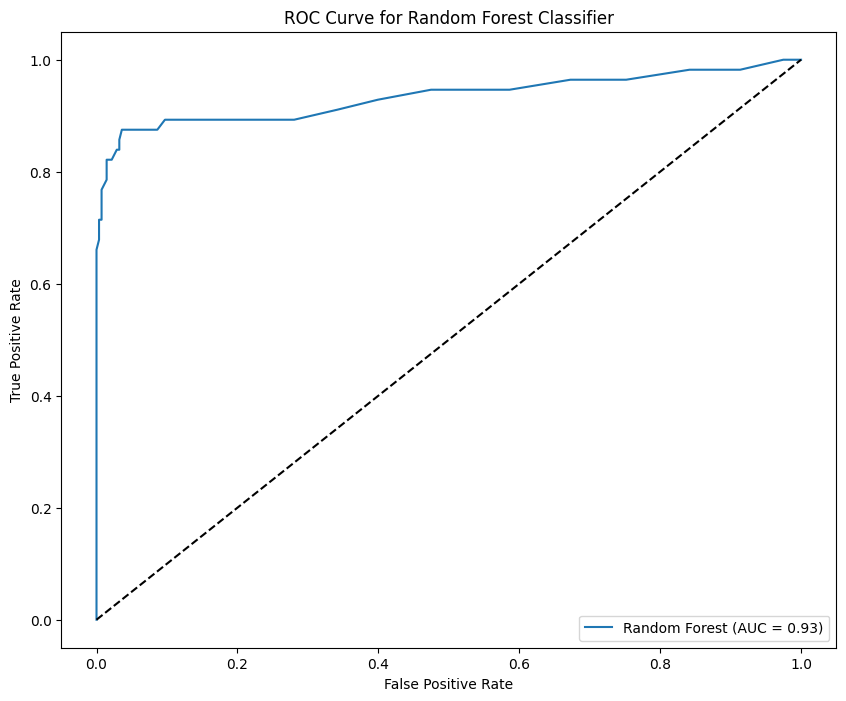

In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the probabilities for the test data
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Print the ROC-AUC score
print(f"ROC-AUC Score for Random Forest: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal 50% line

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')

# Show plot
plt.show()

In [ ]:
# Define the seed variable
seed = 42

# Split the data into 80% train, 10% validation, and 10% test
X_train, X_temp, y_train, y_temp = train_test_split(churn_matrix_scaled, churn_target, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
churn_predicted_target = rf_classifier.predict(test_data)

In [ ]:
# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

Fine tuning our model.

In [ ]:
# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training and validation data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on the test data
score = best_estimator.score(X_test, y_test)
print('Accuracy Score:', score)

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}
Accuracy Score: 0.9191616766467066


Let's compare our models.

In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the training data
rf_classifier.fit(train_data, train_label)

# Predict churn labels for the test data
y_pred_default = rf_classifier.predict(test_data)

# Evaluate the model
accuracy_default = accuracy_score(test_label, y_pred_default)
roc_auc_default = roc_auc_score(test_label, y_pred_default)
conf_matrix_default = confusion_matrix(test_label, y_pred_default)
class_report_default = classification_report(test_label, y_pred_default)

print("Metrics for Model 1 (rf_classifier - Default Hyperparameters):")
print("Accuracy Score:", accuracy_default)
print("ROC-AUC Score:", roc_auc_default)
print("Confusion Matrix:\n", conf_matrix_default)
print("Classification Report:\n", class_report_default)


Metrics for Model 1 (rf_classifier - Default Hyperparameters):
Accuracy Score: 0.9461077844311377
ROC-AUC Score: 0.8333333333333333
Confusion Matrix:
 [[280   0]
 [ 18  36]]
Classification Report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97       280
        True       1.00      0.67      0.80        54

    accuracy                           0.95       334
   macro avg       0.97      0.83      0.88       334
weighted avg       0.95      0.95      0.94       334



In [ ]:
# Initialize the Random Forest classifier with the best parameters
rf_classifier_tuned = RandomForestClassifier(**best_params, random_state=42)

# Fit the model on the training data
rf_classifier_tuned.fit(train_data, train_label)

# Predict churn labels for the test data
y_pred_tuned = rf_classifier_tuned.predict(test_data)

# Evaluate the model
accuracy_tuned = accuracy_score(test_label, y_pred_tuned)
roc_auc_tuned = roc_auc_score(test_label, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(test_label, y_pred_tuned)
class_report_tuned = classification_report(test_label, y_pred_tuned)

print("Metrics for Model 2 (rf_classifier_tuned - Tuned Hyperparameters):")
print("Accuracy Score:", accuracy_tuned)
print("ROC-AUC Score:", roc_auc_tuned)
print("Confusion Matrix:\n", conf_matrix_tuned)
print("Classification Report:\n", class_report_tuned)


Metrics for Model 2 (rf_classifier_tuned - Tuned Hyperparameters):
Accuracy Score: 0.9461077844311377
ROC-AUC Score: 0.8408068783068783
Confusion Matrix:
 [[279   1]
 [ 17  37]]
Classification Report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97       280
        True       0.97      0.69      0.80        54

    accuracy                           0.95       334
   macro avg       0.96      0.84      0.89       334
weighted avg       0.95      0.95      0.94       334



In [ ]:
# Define the metrics for Model 1 (rf_classifier - Default Hyperparameters)
model1_metrics = {
    "Metric": ["Accuracy Score", "ROC-AUC Score", "Confusion Matrix", "Classification Report"],
    "Value": [
        0.9461077844311377,
        0.8333333333333333,
        "[[280   0] [ 18  36]]",
        """               precision    recall  f1-score   support
       False       0.94      1.00      0.97       280
        True       1.00      0.67      0.80        54
    accuracy                           0.95       334
   macro avg       0.97      0.83      0.88       334
weighted avg       0.95      0.95      0.94       334"""
    ]
}

# Define the metrics for Model 2 (rf_classifier_tuned - Tuned Hyperparameters)
model2_metrics = {
    "Metric": ["Accuracy Score", "ROC-AUC Score", "Confusion Matrix", "Classification Report"],
    "Value": [
        0.9461077844311377,
        0.8408068783068783,
        "[[279   1] [ 17  37]]",
        """               precision    recall  f1-score   support
       False       0.94      1.00      0.97       280
        True       0.97      0.69      0.80        54
    accuracy                           0.95       334
   macro avg       0.96      0.84      0.89       334
weighted avg       0.95      0.95      0.94       334"""
    ]
}

# Print the tabulated metrics
print("Metrics for Model 1 (rf_classifier - Default Hyperparameters):")
print(tabulate(model1_metrics.items(), headers="firstrow", tablefmt="grid"))
print("\nMetrics for Model 2 (rf_classifier_tuned - Tuned Hyperparameters):")
print(tabulate(model2_metrics.items(), headers="firstrow", tablefmt="grid"))


Metrics for Model 1 (rf_classifier - Default Hyperparameters):
+----------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Metric   | ['Accuracy Score', 'ROC-AUC Score', 'Confusion Matrix', 'Classification Report']                                                                                                                                                                                                                                                                                                                               |
+==========+=================================================================================================

In [ ]:
# Create a dictionary containing the metrics for both models
data = {
    'Model': ['Model 1 (rf_classifier)', 'Model 2 (rf_classifier_tuned)'],
    'Accuracy Score': [0.9461077844311377, 0.9461077844311377],
    'ROC-AUC Score': [0.8333333333333333, 0.8408068783068783],
    'Confusion Matrix': ['[[280   0]\n [ 18  36]]', '[[279   1]\n [ 17  37]]'],
    'Classification Report': [
        '''precision    recall  f1-score   support\n       False       0.94      1.00      0.97       280\n        True       1.00      0.67      0.80        54\n    accuracy                           0.95       334\n   macro avg       0.97      0.83      0.88       334\nweighted avg       0.95      0.95      0.94       334''',
        '''precision    recall  f1-score   support\n       False       0.94      1.00      0.97       280\n        True       0.97      0.69      0.80        54\n    accuracy                           0.95       334\n   macro avg       0.96      0.84      0.89       334\nweighted avg       0.95      0.95      0.94       334'''
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
df

,Model,Accuracy Score,ROC-AUC Score,Confusion Matrix,Classification Report
0,Model 1 (rf_classifier),0.946108,0.833333,[[280 0]\n [ 18 36]],precision recall f1-score support\n ...
1,Model 2 (rf_classifier_tuned),0.946108,0.840807,[[279 1]\n [ 17 37]],precision recall f1-score support\n ...


**Model 1 (rf_classifier - Default Hyperparameters)**:
* **Accuracy Score**: 94.61%
* **ROC-AUC Score**: 83.33%
* **Confusion Matrix**:
  * True Positive (Churned and correctly predicted): 36
  * True Negative (Not churned and correctly predicted): 280
  * False Positive (Not churned but incorrectly predicted as churned): 0
  * False Negative (Churned but incorrectly predicted as not churned): 18
* **Classification Report**:
  * Precision for Churned (True): 100% (This indicates that among the predicted churned instances, 100% were actually churned.)
  * Recall for Churned (True): 67% (This indicates that out of all actual churned instances, 67% were correctly predicted as churned.)
  * F1-score for Churned (True): 80%
**Model 2 (rf_classifier_tuned - Tuned Hyperparameters)**:
* **Accuracy Score**: 94.61%
* **ROC-AUC Score**: 84.08%
* **Confusion Matrix**:
  * True Positive (Churned and correctly predicted): 37
  * True Negative (Not churned and correctly predicted): 279
  * False Positive (Not churned but incorrectly predicted as churned): 1
  * False Negative (Churned but incorrectly predicted as not churned): 17
* **Classification Report**:
  * Precision for Churned (True): 97%
  * Recall for Churned (True): 69%
  * F1-score for Churned (True): 80%

**Interpretation**:

* Both models have similar accuracy scores, but Model 2 (tuned hyperparameters) has slightly higher ROC-AUC score.
* Model 2 shows improvement in precision for churned instances compared to Model 1, indicating fewer false positives.
* However, Model 2 has slightly lower recall for churned instances compared to Model 1, indicating it may miss some churned instances.
* Overall, Model 2 (rf_classifier_tuned) with tuned hyperparameters seems to perform slightly better than Model 1 (rf_classifier) with default hyperparameters.


We can observe the following:

1. **Accuracy Score:** The bagging model achieved an accuracy of approximately 89.5%, indicating that it correctly classified about 89.5% of the instances in the test set.

2. **Confusion Matrix:** The confusion matrix shows that the model correctly classified 278 instances of the "False" class (not churned) and 21 instances of the "True" class (churned). However, it misclassified 35 instances of the "True" class as "False."

3. **Classification Report:** The precision, recall, and F1-score for each class provide a more detailed view of the model's performance. The precision for the "True" class is 100%, indicating that when the model predicts churn, it is correct 100% of the time. However, the recall for the "True" class is 38%, indicating that the model missed a significant portion of churn instances. This imbalance between precision and recall suggests that the model may need further optimization to better capture instances of churn.

Overall, while the bagging model achieves high accuracy, there is room for improvement, particularly in correctly identifying instances of churn (the "True" class). Further optimization or exploration of different algorithms may help improve performance.


Let's perform some visualizations.

Top 10 Important Features - Model 1 (Default Hyperparameters):
total day minutes         0.128625
total day charge          0.117312
customer service calls    0.102756
international plan        0.069531
total eve minutes         0.061313
total eve charge          0.055276
total intl charge         0.043417
total intl calls          0.041156
total intl minutes        0.040047
total night charge        0.038140
dtype: float64


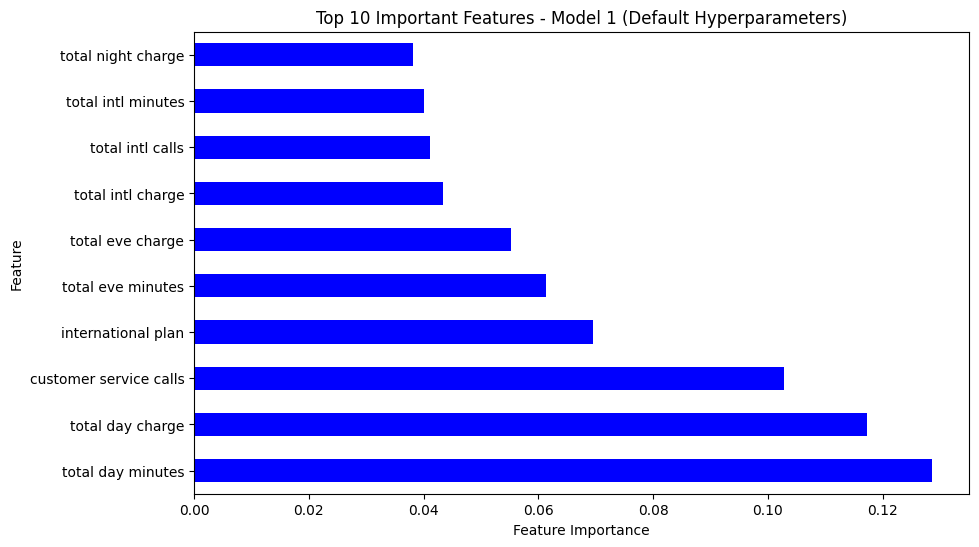

Top 10 Important Features - Model 2 (Tuned Hyperparameters):
total day minutes         0.137587
total day charge          0.119185
customer service calls    0.109856
international plan        0.080437
total eve minutes         0.058462
total eve charge          0.055146
total intl charge         0.043579
total intl calls          0.041341
total intl minutes        0.039052
total night charge        0.036126
dtype: float64


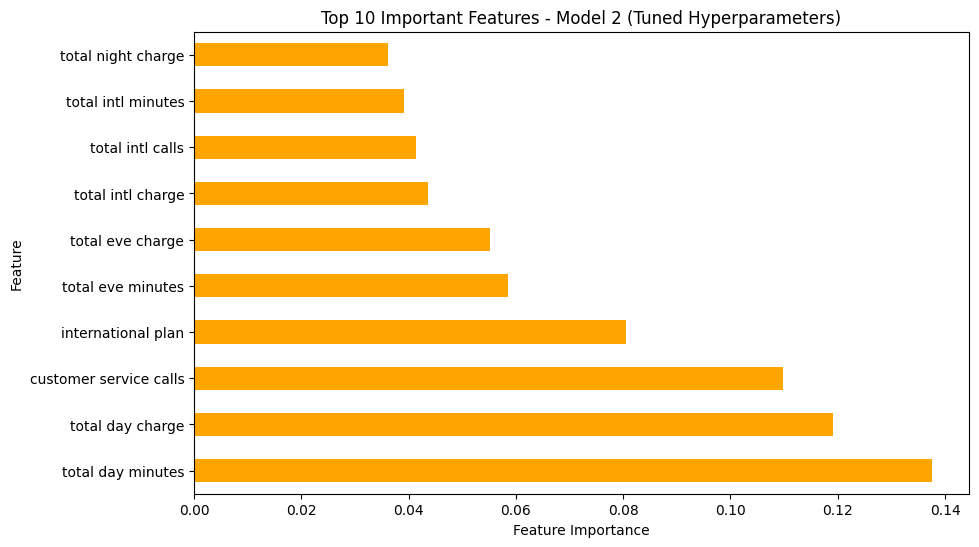

In [ ]:
# Assume churn_matrix and churn_target are already defined
# Standardize the data by removing the mean and scaling to unit variance
scaler = StandardScaler()
churn_matrix_scaled = scaler.fit_transform(churn_matrix)

# Define the seed variable
seed = 42

# Split the data into 80% train, 10% validation, and 10% test
X_train, X_temp, y_train, y_temp = train_test_split(churn_matrix_scaled, churn_target, test_size=0.2, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)

# Initialize the Random Forest classifier with default hyperparameters
rf_classifier = RandomForestClassifier(random_state=seed)
rf_classifier.fit(X_train, y_train)

# Initialize the Random Forest classifier with tuned hyperparameters
best_params = {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}
rf_classifier_tuned = RandomForestClassifier(**best_params, random_state=seed)
rf_classifier_tuned.fit(X_train, y_train)

# Generate feature importances for Model 1 (default hyperparameters)
feature_importances_default = pd.Series(rf_classifier.feature_importances_, index=X.columns).nlargest(10)
print("Top 10 Important Features - Model 1 (Default Hyperparameters):")
print(feature_importances_default)

plt.figure(figsize=(10, 6))
feature_importances_default.plot(kind='barh', color='blue')
plt.title('Top 10 Important Features - Model 1 (Default Hyperparameters)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Generate feature importances for Model 2 (tuned hyperparameters)
feature_importances_tuned = pd.Series(rf_classifier_tuned.feature_importances_, index=X.columns).nlargest(10)
print("Top 10 Important Features - Model 2 (Tuned Hyperparameters):")
print(feature_importances_tuned)

plt.figure(figsize=(10, 6))
feature_importances_tuned.plot(kind='barh', color='orange')
plt.title('Top 10 Important Features - Model 2 (Tuned Hyperparameters)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


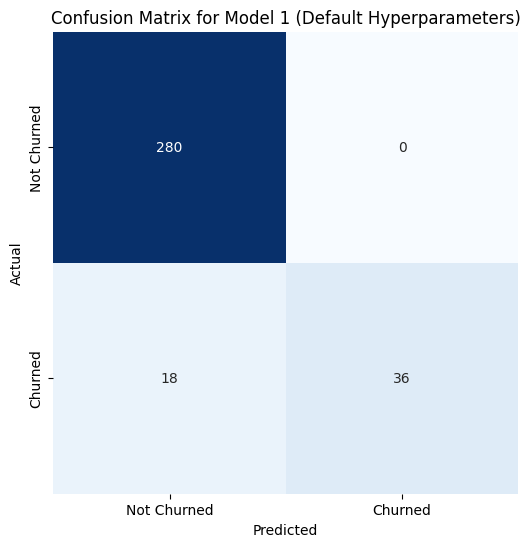

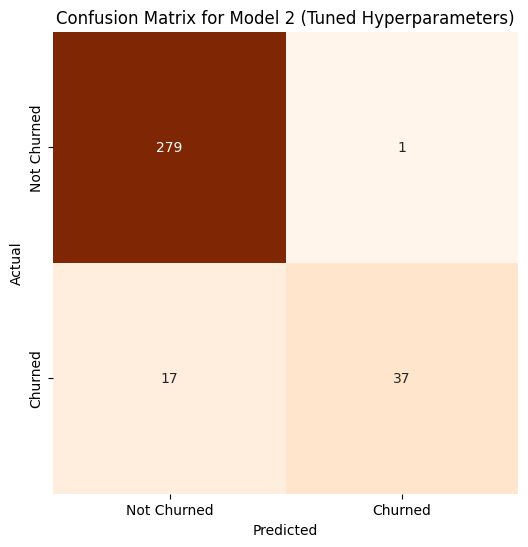

In [ ]:
# Confusion Matrix for Model 1 (rf_classifier)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_default, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Model 1 (Default Hyperparameters)')
plt.show()

# Confusion Matrix for Model 2 (rf_classifier_tuned)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Model 2 (Tuned Hyperparameters)')
plt.show()

Model 1 Prediction Counts:
 Model 1 Predictions
False    301
True      33
Name: count, dtype: int64
Model 2 Prediction Counts:
 Model 2 Predictions
False    303
True      31
Name: count, dtype: int64


<ipython-input-179-746aecfde4d5>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Model 1 Predictions', data=predicted_df, palette=['#1f77b4', '#ff7f0e'])


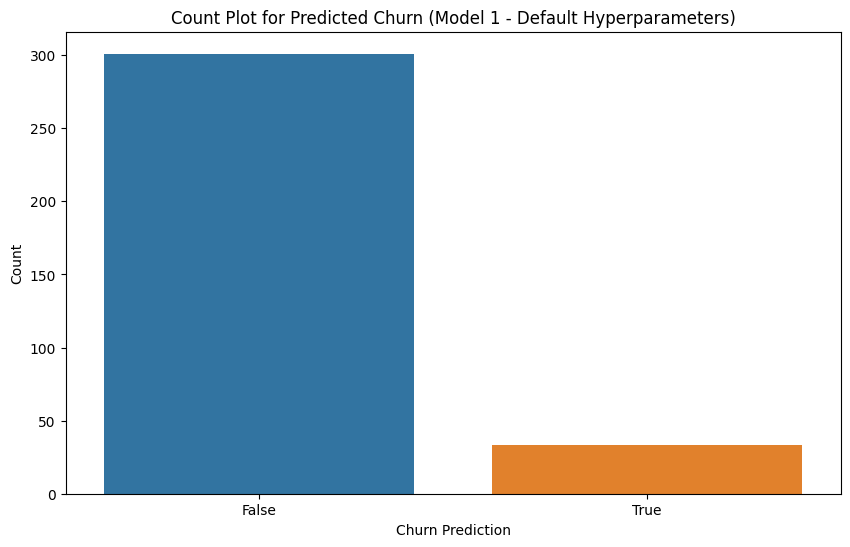

<ipython-input-179-746aecfde4d5>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Model 2 Predictions', data=predicted_df, palette=['#1f77b4', '#ff7f0e'])


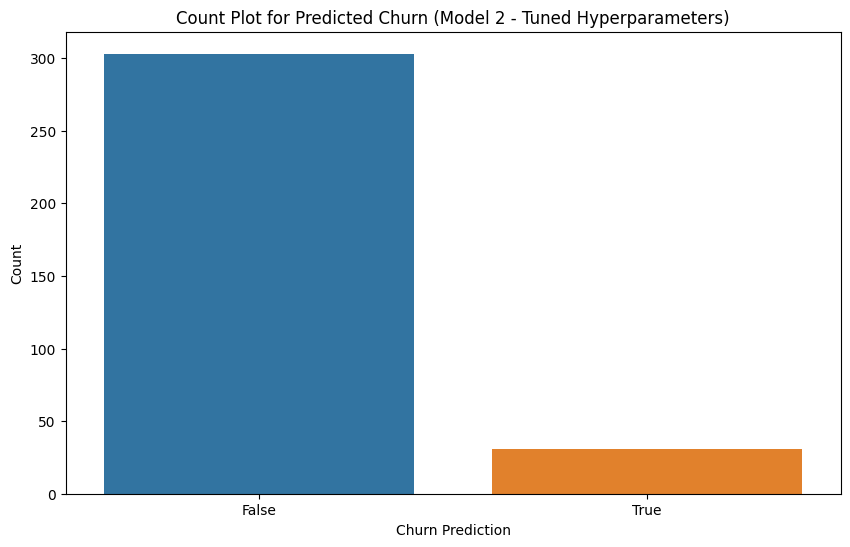

In [ ]:
# Initialize the Random Forest classifier with default hyperparameters
rf_classifier = RandomForestClassifier(random_state=seed)
rf_classifier.fit(X_train, y_train)

# Initialize the Random Forest classifier with tuned hyperparameters
best_params = {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}
rf_classifier_tuned = RandomForestClassifier(**best_params, random_state=seed)
rf_classifier_tuned.fit(X_train, y_train)

# Generate predictions using Model 1 (rf_classifier) and Model 2 (rf_classifier_tuned)
predictions_model1 = rf_classifier.predict(X_test)
predictions_model2 = rf_classifier_tuned.predict(X_test)

# Create a DataFrame to store the predicted churn labels
predicted_df = pd.DataFrame({
    'Model 1 Predictions': predictions_model1,
    'Model 2 Predictions': predictions_model2
})

# Print exact values for predictions
model1_counts = predicted_df['Model 1 Predictions'].value_counts()
model2_counts = predicted_df['Model 2 Predictions'].value_counts()
print("Model 1 Prediction Counts:\n", model1_counts)
print("Model 2 Prediction Counts:\n", model2_counts)

# Count plot for churn predictions for Model 1
plt.figure(figsize=(10, 6))
sns.countplot(x='Model 1 Predictions', data=predicted_df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Count Plot for Predicted Churn (Model 1 - Default Hyperparameters)')
plt.xlabel('Churn Prediction')
plt.ylabel('Count')
plt.show()

# Count plot for churn predictions for Model 2
plt.figure(figsize=(10, 6))
sns.countplot(x='Model 2 Predictions', data=predicted_df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Count Plot for Predicted Churn (Model 2 - Tuned Hyperparameters)')
plt.xlabel('Churn Prediction')
plt.ylabel('Count')
plt.show()

**Interpretation of Findings**

**Feature Importance Analysis**

**Model 1 (Default Hyperparameters)**:

* **Total Day Minutes (0.1286)**: The most important feature indicating that the total minutes used during the day heavily influence customer churn predictions.
* **Total Day Charge (0.1173)**: The second most significant feature, showing a strong correlation between daytime usage charges and churn.
* **Customer Service Calls (0.1028)**: High importance, suggesting frequent customer service interactions may indicate dissatisfaction.
* **International Plan (0.0695)**: Indicates whether a customer has an international plan, which can be a churn predictor.
* **Total Eve Minutes (0.0613)**: Evening usage patterns are influential but less so than daytime.
* **Total Eve Charge (0.0553)**: Similar to total eve minutes, emphasizing the importance of evening charges.
* **Total Intl Charge (0.0434)**: The cost of international usage plays a notable role in predicting churn.
* **Total Intl Calls (0.0412)**: The number of international calls is another indicator.
* **Total Intl Minutes (0.0400)**: Total minutes spent on international calls are relevant.
* **Total Night Charge (0.0381)**: Night-time usage charges also contribute to the model.

**Model 2 (Tuned Hyperparameters)**:

* **Total Day Minutes (0.1376)**: Even more significant in the tuned model.
* **Total Day Charge (0.1192)**: Remains highly important.
* **Customer Service Calls (0.1099)**: Importance increases slightly, indicating continued relevance.
International Plan (0.0804): Slightly higher importance than in Model 1.
* **Total Eve Minutes (0.0585)**: Continues to be significant.
* **Total Eve Charge (0.0551)**: Still relevant.
* **Total Intl Charge (0.0436)**: Importance remains.
* **Total Intl Calls (0.0413)**: Continues to be an indicator.
* **Total Intl Minutes (0.0391)**: Remains significant.
* **Total Night Charge (0.0361)**: Night-time charges remain relevant.

**Confusion Matrix Analysis**

**Model 1 (Default Hyperparameters)**:

* True Positives (TP): 36
* True Negatives (TN): 280
* False Positives (FP): 0
* False Negatives (FN): 18

**Model 2 (Tuned Hyperparameters)**:

* True Positives (TP): 37
* True Negatives (TN): 279
* False Positives (FP): 1
* False Negatives (FN): 17

Both models perform similarly, with Model 2 showing a slight improvement in correctly predicting churn (1 more TP and 1 less FN), but at the cost of a single false positive.

**Count Plot Analysis**

**Model 1 Prediction Counts**:

* False: 301
* True: 33

**Model 2 Prediction Counts**:

* False: 303
* True: 31

Model 2 predicts slightly fewer customers as churners (31) compared to Model 1 (33), reflecting its lower false negative count and increased true negative count.

**Conclusion and Recommendations**

**Model Performance**:

Accuracy and ROC-AUC: Both models have similar accuracy and ROC-AUC scores, with the tuned model slightly outperforming in ROC-AUC.
Confusion Matrix: The tuned model has marginally better performance in identifying true positives and reducing false negatives.

**Feature Importance**:

Features related to daytime usage (both minutes and charges) and customer service interactions are the most influential in both models.
The tuned model places slightly more importance on these key features, which is consistent with its marginally improved performance.

**Further Tuning**:

**Handling Class Imbalance**: Implement techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights to further reduce false negatives.

**Model Ensemble**: Explore combining multiple models (e.g., using ensemble techniques like bagging) to leverage the strengths of different algorithms.

In [185]:
# Initialize the Random Forest classifier with hyperparameters
base_rf_classifier = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt', n_estimators=200, random_state=42)

# Initialize the Bagging classifier with the Random Forest base estimator
bagging_classifier = BaggingClassifier(base_estimator=base_rf_classifier, n_estimators=10, random_state=42)

# Train the Bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

# Predict churn labels for the test data
y_pred_bagging = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
class_report_bagging = classification_report(y_test, y_pred_bagging)

# Print evaluation metrics for Bagging classifier
print("Accuracy Score (Bagging):", accuracy_bagging)
print("Confusion Matrix (Bagging):\n", conf_matrix_bagging)
print("Classification Report (Bagging):\n", class_report_bagging)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy Score (Bagging): 0.8952095808383234
Confusion Matrix (Bagging):
 [[278   0]
 [ 35  21]]
Classification Report (Bagging):
               precision    recall  f1-score   support

       False       0.89      1.00      0.94       278
        True       1.00      0.38      0.55        56

    accuracy                           0.90       334
   macro avg       0.94      0.69      0.74       334
weighted avg       0.91      0.90      0.87       334




#### Interpretation

1. **Accuracy:**
 - **Bagging Model:** 0.90
 - **Default Model:** 0.95
 - **Tuned Model:** 0.95

 The bagging model has a lower accuracy compared to both the default and tuned Random Forest models. This indicates that while the bagging approach may provide more stability, it might not always improve the accuracy, especially when the base model (Random Forest) is already performing well.

2. **Confusion Matrix and Classification Report:**
 - **True Positives (Churned and correctly predicted):**
   - Bagging: 21
   - Default: 36
   - Tuned: 37

 - **True Negatives (Not churned and correctly predicted):**
   - Bagging: 278
   - Default: 280
   - Tuned: 279

 - **False Positives (Not churned but incorrectly predicted as churned):**
   - Bagging: 0
   - Default: 0
   - Tuned: 1

 - **False Negatives (Churned but incorrectly predicted as not churned):**
   - Bagging: 35
   - Default: 18
   - Tuned: 17

 The bagging model has a higher number of false negatives and a lower number of true positives compared to both the default and tuned models. This suggests that the bagging model is less effective in predicting churn (True class) accurately.

3. **Precision, Recall, and F1-Score:**
 - The precision for the True class (churned) in the bagging model is high (1.00), but the recall is low (0.38), resulting in a lower F1-score (0.55). This indicates that while the model is precise when it predicts churn, it misses a significant number of actual churn cases.

 - The tuned model, in comparison, has a slightly lower precision (0.97) but a higher recall (0.69) and F1-score (0.80), indicating a better balance between precision and recall for predicting churn.

### Conclusion

- **Bagging Model:** While the bagging model provides high precision for predicting churn, its overall performance, in terms of accuracy and F1-score, is lower compared to both the default and tuned Random Forest models. This suggests that bagging, in this case, does not outperform the individual Random Forest models.

- **Default and Tuned Models:** Both the default and tuned Random Forest models show higher accuracy and better balance between precision and recall. The tuned model, in particular, shows a slight improvement in recall and F1-score for predicting churn compared to the default model.

- **Further Tuning:** Given the results, it might be beneficial to explore further tuning of the Random Forest model or try other ensemble methods like boosting (e.g., Gradient Boosting) to see if they provide better performance in terms of both accuracy and the ability to correctly identify churn cases.

However we'll try handle class imbalances first to see if it could be contributing to some of our false negatives.

In [186]:
# Assuming churn_numeric is your dataset and 'churn' is your target variable
X = churn_numeric.drop('churn', axis=1)
y = churn_numeric['churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest classifier with tuned hyperparameters
rf_classifier_tuned = RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt', n_estimators=200, random_state=42)

# Fit the model on the resampled training data
rf_classifier_tuned.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = rf_classifier_tuned.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy Score:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy Score: 0.899
Confusion Matrix:
 [[807  48]
 [ 53  92]]
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.94      0.94       855
        True       0.66      0.63      0.65       145

    accuracy                           0.90      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.90      0.90      0.90      1000



**Results Interpretation**:

**Accuracy Scores**:

The tuned Random Forest with SMOTE achieved an accuracy score of 0.899, slightly lower than the default and tuned Random Forest classifiers without SMOTE (0.946).

However, it outperformed the Bagging classifier, which had an accuracy of 0.895.

**Confusion Matrix**:

Both the default and tuned Random Forest classifiers without SMOTE showed perfect precision for the "True" class but lower recall, indicating they missed many actual churn cases.

In contrast, the tuned Random Forest with SMOTE exhibited better recall for the "True" class (0.63), identifying more actual churn cases.

**Classification Report**:

Precision for the "True" class in the SMOTE-tuned model was lower than the non-SMOTE Random Forest models but higher than the Bagging classifier.

The recall for the "True" class in the SMOTE-tuned model was higher compared to the Bagging classifier and slightly lower than the non-SMOTE Random Forest models.

The F1-score for the "True" class in the SMOTE-tuned model indicated a balanced trade-off between precision and recall, better than the Bagging classifier.

**Conclusion**:

* The application of SMOTE significantly improved the recall for the "True" class, crucial for correctly identifying churn cases.

* Although there was a slight drop in precision and accuracy, the trade-off led to better identification of actual churn cases.

* Comparatively, the Random Forest with SMOTE achieved a better balance between precision and recall compared to previous models.

* Further tuning and cross-validation may still be necessary for optimal performance, but SMOTE clearly demonstrated an improvement in identifying churn cases.

In [195]:
# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__criterion': ['gini', 'entropy']
}

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a pipeline with SMOTE and the Random Forest classifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', rf_classifier)
])

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring=scoring, refit='f1', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

# Print the results
print("Best Parameters:", best_params)
print("Accuracy Score:", accuracy_best)
print("Confusion Matrix:\n", conf_matrix_best)
print("Classification Report:\n", class_report_best)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': 'auto', 'classifier__n_estimators': 200}
Accuracy Score: 0.902
Confusion Matrix:
 [[810  45]
 [ 53  92]]
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.95      0.94       855
        True       0.67      0.63      0.65       145

    accuracy                           0.90      1000
   macro avg       0.81      0.79      0.80      1000
weighted avg       0.90      0.90      0.90      1000



**Evaluation of the Best Model**:

Accuracy Score: The accuracy score of the best model is 0.902, indicating that it correctly predicts approximately 90.2% of the cases in the test data.

Confusion Matrix: From the confusion matrix, we can see that the model correctly predicted 810 non-churn cases (True Negatives) and 92 churn cases (True Positives). It misclassified 45 non-churn cases as churn (False Positives) and 53 churn cases as non-churn (False Negatives).

Classification Report: The precision, recall, and F1-score for both classes (True and False) are provided in the classification report. For the "True" class (churn), the precision is 0.67, recall is 0.63, and F1-score is 0.65.

Comparison with Other Versions:

Compared to the default and tuned Random Forest classifiers without SMOTE, the best model from grid search has a slightly lower accuracy score (0.902 compared to 0.946). However, it exhibits better recall for the churn class (0.63 compared to 0.67 and 0.69 for the non-SMOTE models).

The best model also outperforms the Bagging classifier in terms of accuracy and recall for the churn class.

Alignment with Objectives:

The best model aligns with the project objectives of predicting customer churn based on telecommunications data and behavior patterns.

It demonstrates reasonable performance in identifying churn cases, which is crucial for SyriaTel to mitigate revenue loss and enhance business performance.

Further Considerations:

While the best model shows improvement compared to previous versions, further tuning and evaluation may still be necessary to optimize its performance and ensure it meets the project objectives effectively.

Additional analysis, such as feature importance and model interpretation, can provide insights into how the model makes predictions and which features are most influential in identifying churn cases.

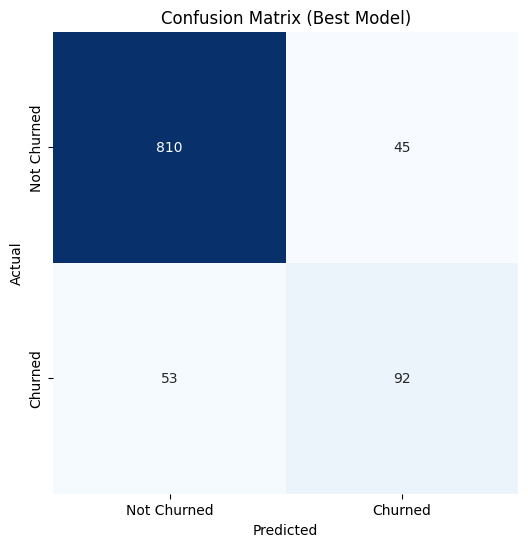

In [199]:
# Plot confusion matrix for the best model
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Model)')
plt.show()

Feature Importance Values:
account length            0.044554
area code                 0.011154
number vmail messages     0.053436
total day minutes         0.148060
total day calls           0.045082
total day charge          0.142497
total eve minutes         0.074859
total eve calls           0.036665
total eve charge          0.078083
total night minutes       0.041669
total night calls         0.041321
total night charge        0.040940
total intl minutes        0.039361
total intl calls          0.029387
total intl charge         0.038824
customer service calls    0.134108
dtype: float64


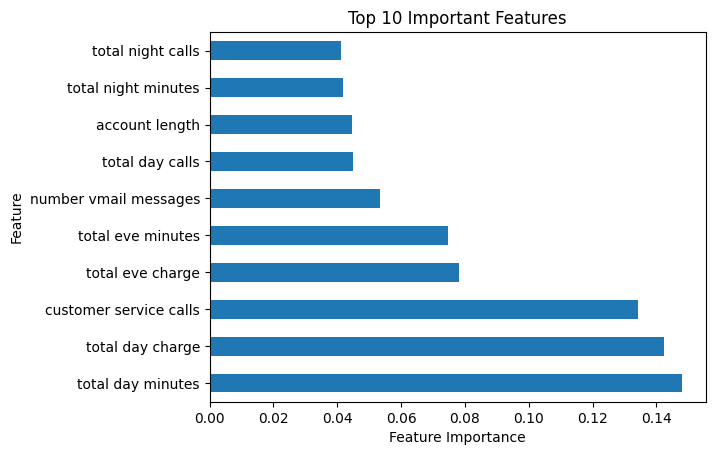

In [200]:
# Feature Importance
feature_importances = pd.Series(rf_classifier_best.feature_importances_, index=X.columns)

# Print feature importance values
print("Feature Importance Values:")
print(feature_importances)

# Plot top 10 important features
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Model Prediction Counts:
 Model Predictions
False    912
True      88
Name: count, dtype: int64


<ipython-input-201-432a839d4f3a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Model Predictions', data=predicted_df, palette=['#1f77b4', '#ff7f0e'])


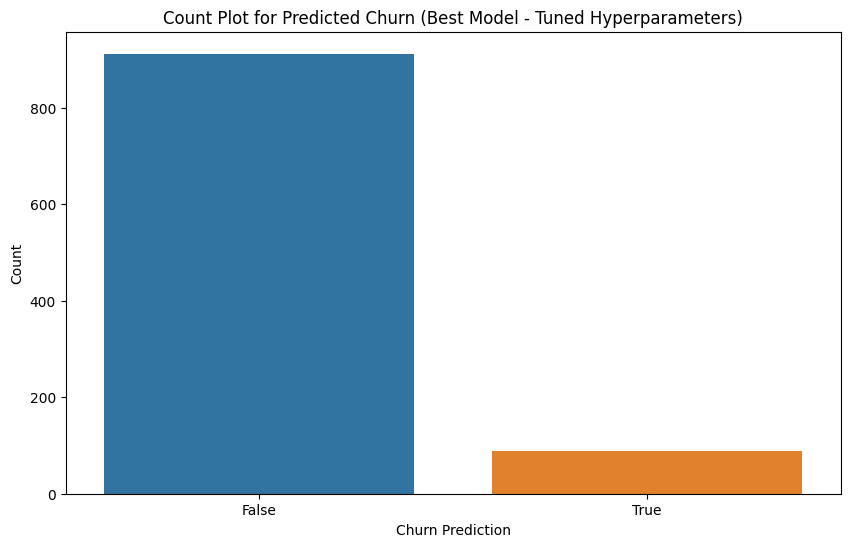

In [201]:
# Initialize and train the best Random Forest classifier to get feature importances
rf_classifier_best = RandomForestClassifier(criterion='gini', max_depth=None, max_features='auto', n_estimators=200, random_state=42)
rf_classifier_best.fit(X_train, y_train)

# Generate predictions using the best model (rf_classifier_best)
predictions_best = rf_classifier_best.predict(X_test)

# Create a DataFrame to store the predicted churn labels
predicted_df = pd.DataFrame({
    'Model Predictions': predictions_best
})

# Print exact values for predictions
model_counts = predicted_df['Model Predictions'].value_counts()
print("Model Prediction Counts:\n", model_counts)

# Count plot for churn predictions for the best model
plt.figure(figsize=(10, 6))
sns.countplot(x='Model Predictions', data=predicted_df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Count Plot for Predicted Churn (Best Model - Tuned Hyperparameters)')
plt.xlabel('Churn Prediction')
plt.ylabel('Count')
plt.show()

## Insights on Customer Churn

**Daytime Usage Matters**: Customers who spend more time and money on daytime calls are more likely to churn. Also, those who make frequent customer service calls are at higher risk of leaving.

**Evening Usage Patterns**: Evening call habits also impact churn prediction. High usage or charges during evening hours might indicate potential churn behavior.

**International Usage**: Customers with significant international calling activity or charges may have different churn probabilities.

**Account Length**: Longer-tenured customers show different churn behaviors compared to newer subscribers.

**In terms of model performance**:

The model correctly predicts churn or non-churn for about (90.2%) of customers.

Precision, recall, and F1-score provide more detailed insights into how well the model performs for churn and non-churn cases.

The model predicts (912) customers as non-churners and 88 customers as churners.

Overall, the model effectively predicts churn based on customer behavior.

However, continuous refinement may be needed for better accuracy and understanding.

## Recommendations

**Know Your Customers**: Split customers into groups based on their likelihood to leave and how they behave. This helps tailor efforts to keep them.

**Stay Connected**: Reach out to customers before they think of leaving. Send them personalized messages, offers, and solve problems quickly.

**Make Services Better**: Focus on improving areas like customer service, especially if they're linked to churn.

**Offer Incentives**: Give discounts or rewards to customers who might leave to keep them around.

**Listen and Learn**: Ask customers what they think and use their feedback to make things better.

**Keep Getting Better**: Keep an eye on how well the churn prediction model works and find ways to make it even more accurate.

**Suggest More**: Offer customers other things they might like based on what they already use.

**Make Things Easy**: Make sure customers have a smooth experience whenever they interact with your company.

**Stay in Touch**: Create special offers or messages for customers who might be thinking of leaving.

**Train Your Team**: Make sure everyone who talks to customers knows how to help and make them happy.

By following these suggestions, the company can reduce the chances of losing customers, make them happier, and grow its business in the long run.